# Python의 라이브러리 - Pandas & Matplotlib

## 학습목표
- Pandas의 주요 특성을 파악한다.
- Pandas의 DataFrame 개념을 이해한다.
- Pandas의 기본 기능을 이용해 데이터를 불러와 조건에 맞는 데이터를 필터링해본다.
- Pandas의 핵심 기능을 익히고 실습을 통해 이해한다.
- Pandas로 분석한 결과를 Matplotlib을 이용해 그래프로 작성해 본다.

# Pandas

- pandas는 오픈소스
- 고성능의 사용이 쉬운 데이터구조와 python 프로그래밍언어를 위한 데이터분석 도구
- **pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language**
- 2008년, AQR 투자 운용 회사(Capital Management)에 다니던 Wes McKinney가 개발 시작



- 데이터프레임을 제공하여 테이블 구조의 데이터 처리를 편리하게 해줌, R의 data.frame 구조체와 같은 용도로 사용됨
- numpy의 배열에는 모두 숫자만 들어올 수 있으나, 데이터프레임에는 임의의 타입의 데이터를 담을 수 있음
- numpy를 기반으로 개발된 도구
- 다량의 데이터를 처리
- 다양한 데이터가 섞여 있을 경우도 분석이 가능
- numpy가 수치 계산에 최적화된 패키지라면 pandas는 데이터 처리에 최적화된 패키지

## import and set

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series 
from numpy import array    

In [2]:
arr = array([1,2])
arr

array([1, 2])

## Data Structure

### DataFrame의 구성 - 자료화된 구조

<img src="http://bookdata.readthedocs.io/en/latest/_images/base_01_pandas_5_0.png">

In [3]:
import pandas as pd

customer = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }
customer

{'Name': ['John', 'Anna', 'Peter', 'Linda'],
 'Location': ['New York', 'Paris', 'Berlin', 'London'],
 'Age': [24, 13, 53, 33]}

In [4]:
a = pd.DataFrame(customer)       # DataFrame 함수로 data객체를 데이터프레임으로 만들어 a라는 객체에 저장
a

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [5]:
# 데이터 전반 알아보기 --> info, describe. head
a.describe()

,Age
count,4.000000
mean,30.750000
std,16.938615
min,13.000000
25%,21.250000
50%,28.500000
75%,38.000000
max,53.000000


In [6]:
a.sum()     

Name               JohnAnnaPeterLinda
Location    New YorkParisBerlinLondon
Age                               123
dtype: object

In [7]:
# 나이의 합계만 보고싶다면 --> a에 있는 Age의 합계만 보여달라
a['Age'].sum()       # a.Age.sum()             
                      

123

In [8]:
sum(a['Age'])

123

In [9]:
a.Age.mean()

30.75

In [10]:
a.Age # '.' -->1. 구분, 2. 주소

0    24
1    13
2    53
3    33
Name: Age, dtype: int64

In [11]:
# 사는 곳이 New York인 사람의 관련 데이터가 궁금하다면?
a[a['Location'] == 'New York']

,Name,Location,Age
0,John,New York,24


In [12]:
# 나이가 30세 이상인 사람의 관련 데이터들이 보고싶다면?
a[a['Age'] >= 30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


# Pandas를 활용한 데이터 살펴보기 실습

- 데이터를 불러와 살펴보기

In [13]:
import pandas as pd
import os           

In [14]:
# 데이터 불러오기(read_csv() 사용) 
# encoding error CP949 또는 utf-8
apt = pd.read_csv('../Data/apt.csv', encoding='CP949')
apt.head()

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [15]:
# 데이터 테이블(데이터 프레임) 크기 살펴보기, len() --> length
len(apt)

42758

In [16]:
apt.shape

(42758, 12)

In [17]:
# key값 살펴보기                           # Dictionary에서 key값 보기
# apt.columns # key값을 일려주는 attribute
apt.keys()

Index(['지역', '번지', '본번', '부번', '아파트', '면적', '계약년월', '계약일', '가격', '층', '건축년도',
       '도로명'],
      dtype='object')

In [18]:
apt.index

RangeIndex(start=0, stop=42758, step=1)

In [19]:
# 데이터 테이블의 앞부분 살펴 보기
apt.head()

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [20]:
# 데이터 테이블의 뒷부분 살펴 보기
apt.tail()

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


In [21]:
apt.head(10)

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.8000,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.1750,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,20,20500,1,2005,경강로2539번길 22
5,강원도 강릉시 교동,1984,1984,0,강릉 교동 풍림아이원 아파트,84.9964,201910,5,29200,14,2017,화부산로40번길 29
6,강원도 강릉시 교동,1982,1982,0,강릉교동롯데캐슬1단지,135.1727,201910,21,34300,9,2009,화부산로99번길 12
7,강원도 강릉시 교동,1983,1983,0,강릉교동롯데캐슬2단지,118.0686,201910,1,32500,2,2009,화부산로111번길 24
8,강원도 강릉시 교동,1750,1750,0,교동1주공,59.8900,201910,2,16200,10,1999,가작로 78
9,강원도 강릉시 교동,1750,1750,0,교동1주공,84.8400,201910,18,21550,9,1999,가작로 78


In [22]:
apt.tail(10)

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명
42748,충청북도 충주시 호암동,1052,1052,0,우미린에듀시티,119.9162,201910,17,35400,14,2019,호암수청1로 13
42749,충청북도 충주시 호암동,135,135,0,진도,76.4300,201910,19,8500,10,1994,호암중앙2로 27
42750,충청북도 충주시 호암동,547-6,547,6,호반현대,84.9600,201910,6,9800,8,1994,신촌2길 29
42751,충청북도 충주시 호암동,547-6,547,6,호반현대,84.9600,201910,13,10000,2,1994,신촌2길 29
42752,충청북도 충주시 호암동,547-6,547,6,호반현대,84.9600,201910,26,9050,1,1994,신촌2길 29
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.7600,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,26,11200,11,2002,원호암5길 32


In [23]:
# '가격' 데이터를 보고 싶다면?
apt['가격']

0        10900
1        18500
2        25000
3        20600
4        20500
         ...  
42753     7000
42754    12000
42755    11000
42756    12000
42757    11200
Name: 가격, Length: 42758, dtype: int64

In [24]:
# apt.가격 > 20000
apt[apt.가격 > 20000]                     

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,20,20500,1,2005,경강로2539번길 22
5,강원도 강릉시 교동,1984,1984,0,강릉 교동 풍림아이원 아파트,84.9964,201910,5,29200,14,2017,화부산로40번길 29
6,강원도 강릉시 교동,1982,1982,0,강릉교동롯데캐슬1단지,135.1727,201910,21,34300,9,2009,화부산로99번길 12
...,...,...,...,...,...,...,...,...,...,...,...,...
42703,충청북도 충주시 중앙탑면 용전리,656,656,0,미진 이지비아,84.9807,201910,4,21000,12,2017,기업도시로 189
42704,충청북도 충주시 중앙탑면 용전리,656,656,0,미진 이지비아,84.9807,201910,12,21400,8,2017,기업도시로 189
42706,충청북도 충주시 중앙탑면 용전리,721,721,0,충주시티자이,84.9571,201910,1,24350,11,2017,원앙4길 51
42709,충청북도 충주시 중앙탑면 용전리,721,721,0,충주시티자이,72.9988,201910,16,21500,13,2017,원앙4길 51


In [25]:
# 2억 원 이상되는 아파트의 관련 데이터를 전부 보고 싶다면? 
apt[apt.가격 >= 20000]           

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,20,20500,1,2005,경강로2539번길 22
5,강원도 강릉시 교동,1984,1984,0,강릉 교동 풍림아이원 아파트,84.9964,201910,5,29200,14,2017,화부산로40번길 29
6,강원도 강릉시 교동,1982,1982,0,강릉교동롯데캐슬1단지,135.1727,201910,21,34300,9,2009,화부산로99번길 12
...,...,...,...,...,...,...,...,...,...,...,...,...
42703,충청북도 충주시 중앙탑면 용전리,656,656,0,미진 이지비아,84.9807,201910,4,21000,12,2017,기업도시로 189
42704,충청북도 충주시 중앙탑면 용전리,656,656,0,미진 이지비아,84.9807,201910,12,21400,8,2017,기업도시로 189
42706,충청북도 충주시 중앙탑면 용전리,721,721,0,충주시티자이,84.9571,201910,1,24350,11,2017,원앙4길 51
42709,충청북도 충주시 중앙탑면 용전리,721,721,0,충주시티자이,72.9988,201910,16,21500,13,2017,원앙4길 51


>**Q. 면적이 130(제곱미터) 넘는 아파트의 가격만 보고 싶다면 어떻게 해야할까요?**

In [26]:
# 해봅시다.^^.
apt.가격[apt.면적 > 135.0000]  

6        34300
39       21000
334      29500
434      24000
541      44600
         ...  
42595    15000
42607    18500
42663    31500
42736    18500
42737    16200
Name: 가격, Length: 889, dtype: int64

In [27]:
# 가격 외에 지역도 함께 보고 싶다면? ✔ List 활용
apt[['지역', '가격']][apt.면적 > 135.0000]    

,지역,가격
6,강원도 강릉시 교동,34300
39,강원도 강릉시 남문동,21000
334,강원도 속초시 금호동,29500
434,강원도 원주시 개운동,24000
541,강원도 원주시 무실동,44600
...,...,...
42595,충청북도 충주시 문화동,15000
42607,충청북도 충주시 안림동,18500
42663,충청북도 충주시 연수동,31500
42736,충청북도 충주시 칠금동,18500


>**Q. 가격이 2억 원 미만이면서 면적이 150 이상인 아파트가 있는 지역을 보려면 어떻게 할까요?**

In [28]:
# 해봅시다.^^.
apt[['지역', '아파트','가격']][apt['면적'] >= 150.0000][apt['가격'] < 200000]

/tmp/ipykernel_6453/2936722620.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  apt[['지역', '아파트','가격']][apt['면적'] >= 150.0000][apt['가격'] < 200000]


,지역,아파트,가격
39,강원도 강릉시 남문동,삼익그린맨션,21000
334,강원도 속초시 금호동,보람레이크더하임,29500
541,강원도 원주시 무실동,무실e-편한세상,44600
592,강원도 원주시 반곡동,원주반곡아이파크,40700
702,강원도 원주시 판부면 서곡리,원주더샾아파트,34000
...,...,...,...
42367,충청북도 청주흥덕구 복대동,신영지웰시티 1차,67000
42424,충청북도 청주흥덕구 봉명동,봉명아이파크,49000
42483,충청북도 청주흥덕구 신봉동,삼정백조,20000
42589,충청북도 충주시 문화동,럭키,19000


In [29]:
a = apt[['아파트','가격', '지역']]
a

,아파트,가격,지역
0,송정한신,10900,강원도 강릉시 견소동
1,송정한신,18500,강원도 강릉시 견소동
2,송정해변신도브래뉴아파트,25000,강원도 강릉시 견소동
3,송정해변신도브래뉴아파트,20600,강원도 강릉시 견소동
4,송정해변신도브래뉴아파트,20500,강원도 강릉시 견소동
...,...,...,...
42753,호반현대,7000,충청북도 충주시 호암동
42754,호암리버빌(1단지),12000,충청북도 충주시 호암동
42755,호암리버빌(1단지),11000,충청북도 충주시 호암동
42756,호암리버빌(1단지),12000,충청북도 충주시 호암동


In [30]:
# 저장 --> to_csv(), to_exec
a.to_csv('../Data/my_apt.csv')

In [31]:
# 조건들을 묶어서 사용할 때 --> () & ()
# & --> 교집합, | --> 합집합
# &, | --> 비트연산자
# and, or --> 논리연산자

apt[['지역', '아파트','가격']][(apt['가격'] < 20000) & (apt['면적'] >= 150.0000) & (apt['층'] > 10)]

,지역,아파트,가격
38810,전라북도 전주완산구 효자동1가,남양황실,15300


## 인사이트
- 객체에 조건 걸어서 원하는 컬럼만 모아서 따로 테이블을 만들수 있다
- 컬럼에 순서를 원하는 순으로 정렬한 테이블을 만들수 있다

- 데이터 프레임에서 좀 더 정교하게 조건을 추가해서 원하는 자료 살펴보기
> - loc 함수 --> '데이터 프레임 분석'에 가장 많이 사용되는 함수 중 하나, ✔ 조건은 반드시 [ ] 사용, 행과 열의 조건 지정
>> - location

In [32]:
apt.head()

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [33]:
# loc 함수(사람이 인지하는 인댁스) 실습(행과 열 조건 지정)
# Location --> ~를 찾다, 예 위치하다 --> loc[행의 위치, 열의 위지]
# iloc --> iloc함수(기계가 인지하는 인덱스)행과 열의 위치를 이용해서 조건을 만족하는 데이터를 찾음
apt.loc[0:5, ['아파트', '가격']]

,아파트,가격
0,송정한신,10900
1,송정한신,18500
2,송정해변신도브래뉴아파트,25000
3,송정해변신도브래뉴아파트,20600
4,송정해변신도브래뉴아파트,20500
5,강릉 교동 풍림아이원 아파트,29200


In [34]:
apt.iloc[0:6, [4,8]]
apt.columns

Index(['지역', '번지', '본번', '부번', '아파트', '면적', '계약년월', '계약일', '가격', '층', '건축년도',
       '도로명'],
      dtype='object')

In [35]:
# 10억 원을 초과하는 가격으로 거래된 아파트 출력(지역, 아파트명, 가격을 보고 싶을 때) → loc 함수 이용한다면?
apt.loc[0:, ['지역','아파트', '가격']][apt['가격'] > 100000]


,지역,아파트,가격
1571,경기도 고양일산동구 식사동,위시티일산자이4단지,118000
1940,경기도 고양일산서구 탄현동,일산두산위브더제니스,120100
1943,경기도 고양일산서구 탄현동,일산두산위브더제니스,113300
2017,경기도 과천시 별양동,래미안 센트럴스위트,140000
2018,경기도 과천시 별양동,래미안슈르,107000
...,...,...,...
31545,서울특별시 중구 회현동1가,남산 롯데캐슬 아이리스,113000
35821,인천광역시 연수구 송도동,더샵센트럴파크1,130000
35826,인천광역시 연수구 송도동,더샵센트럴파크2,300000
35828,인천광역시 연수구 송도동,더샵센트럴파크2,131500


In [36]:
# loc 함수 이용 시, 원하는 조건을 행 조건으로 걸어줄 수도 있음
apt.loc[apt['가격'] > 100000, ['지역','아파트', '가격']]

,지역,아파트,가격
1571,경기도 고양일산동구 식사동,위시티일산자이4단지,118000
1940,경기도 고양일산서구 탄현동,일산두산위브더제니스,120100
1943,경기도 고양일산서구 탄현동,일산두산위브더제니스,113300
2017,경기도 과천시 별양동,래미안 센트럴스위트,140000
2018,경기도 과천시 별양동,래미안슈르,107000
...,...,...,...
31545,서울특별시 중구 회현동1가,남산 롯데캐슬 아이리스,113000
35821,인천광역시 연수구 송도동,더샵센트럴파크1,130000
35826,인천광역시 연수구 송도동,더샵센트럴파크2,300000
35828,인천광역시 연수구 송도동,더샵센트럴파크2,131500


- 데이터 프레임에 새로운 열 추가하기

In [37]:
# Dictionary 기억 떠올리기!!
# 
d = {1:'a', 2:'b'} # 3:'c'를 d에 추가 하고 싶을때
d[3]='c'
d

{1: 'a', 2: 'b', 3: 'c'}

In [38]:
# 아파트의 단가를 계산해서 표에 넣고 싶을 때 → Dictionary 기억 떠올리기!!
apt['단가']= apt['가격']/apt['면적']

In [39]:
apt.head()

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명,단가
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,182.274247
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,159.242522
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,294.152253
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,242.381457
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,241.204848


In [40]:
apt.head()

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명,단가
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,182.274247
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,159.242522
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,294.152253
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,242.381457
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,241.204848


In [41]:
# loc 함수를 이용해 지역, 아파트, 가격, 면적, 단가를 보고 싶다면?
apt.loc[:, ['지역','아파트','가격', '면적', '단가']]

,지역,아파트,가격,면적,단가
0,강원도 강릉시 견소동,송정한신,10900,59.800,182.274247
1,강원도 강릉시 견소동,송정한신,18500,116.175,159.242522
2,강원도 강릉시 견소동,송정해변신도브래뉴아파트,25000,84.990,294.152253
3,강원도 강릉시 견소동,송정해변신도브래뉴아파트,20600,84.990,242.381457
4,강원도 강릉시 견소동,송정해변신도브래뉴아파트,20500,84.990,241.204848
...,...,...,...,...,...
42753,충청북도 충주시 호암동,호반현대,7000,59.760,117.135207
42754,충청북도 충주시 호암동,호암리버빌(1단지),12000,84.680,141.709967
42755,충청북도 충주시 호암동,호암리버빌(1단지),11000,84.680,129.900803
42756,충청북도 충주시 호암동,호암리버빌(1단지),12000,84.680,141.709967


- 데이터 프레임에서 데이터 정렬하기

In [42]:
# 아파트의 가격을 기준으로 정렬
apt.sort_values(by='가격', ascending=False)

,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명,단가
31258,서울특별시 용산구 한남동,810,810,0,한남더힐,233.0620,201910,24,485000,4,2011,독서당로 111,2080.991324
27061,서울특별시 강남구 도곡동,202,202,0,상지리츠빌 카일룸,210.5000,201910,24,461000,2,2018,남부순환로373길 23,2190.023753
29946,서울특별시 서초구 반포동,02월 12일,2,12,아크로리버파크,129.9200,201910,14,415000,8,2016,신반포로15길 19,3194.273399
26805,부산광역시 해운대구 우동,1407,1407,0,해운대두산위브더제니스,209.8332,201910,16,376640,70,2011,마린시티2로 33,1794.949512
27036,서울특별시 강남구 대치동,670,670,0,동부센트레빌,161.4700,201910,29,373000,3,2005,선릉로 206,2310.026630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17027,경상북도 구미시 원평동,937-68,937,68,원평주공,40.3200,201910,16,800,3,1984,칠성로2길 16,19.841270
17025,경상북도 구미시 원평동,937-68,937,68,원평주공,40.4500,201910,7,800,1,1984,칠성로2길 16,19.777503
17637,경상북도 칠곡군 약목면 관호리,산74-10,74,10,성재,31.6200,201910,17,750,6,1990,관호8길 32-2,23.719165
17022,경상북도 구미시 원평동,937-68,937,68,원평주공,49.2200,201910,4,700,3,1984,칠성로2길 15,14.221861


In [43]:
apt.sort_values(by = '가격', ascending = False).loc[:,('지역','가격')]   

,지역,가격
31258,서울특별시 용산구 한남동,485000
27061,서울특별시 강남구 도곡동,461000
29946,서울특별시 서초구 반포동,415000
26805,부산광역시 해운대구 우동,376640
27036,서울특별시 강남구 대치동,373000
...,...,...
17027,경상북도 구미시 원평동,800
17025,경상북도 구미시 원평동,800
17637,경상북도 칠곡군 약목면 관호리,750
17022,경상북도 구미시 원평동,700


In [44]:
# 문자열을 다루는 것도 당연히 가능
## 특정한 문자를 포함하는 열을 추출 가능
# Table에서 사용할때는 str.find()
### str.find() 함수 사용
# str 붙이는 경우는 -> 전체 데이터중 일부를 다룰때
# apt.loc[apt['지역'].str.contains('서울'),['지역','가격']]
apt.지역.str.find('강릉')


0        4
1        4
2        4
3        4
4        4
        ..
42753   -1
42754   -1
42755   -1
42756   -1
42757   -1
Name: 지역, Length: 42758, dtype: int64

In [45]:
# apt.csv 파일에서 '지역' 중 '강릉'만 추출하고 싶다면?
apt.loc[(apt.지역.str.find('강릉') > -1)]


,지역,번지,본번,부번,아파트,면적,계약년월,계약일,가격,층,건축년도,도로명,단가
0,강원도 강릉시 견소동,202,202,0,송정한신,59.8000,201910,4,10900,5,1997,경강로2539번길 8,182.274247
1,강원도 강릉시 견소동,202,202,0,송정한신,116.1750,201910,31,18500,10,1997,경강로2539번길 8,159.242522
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,5,25000,6,2005,경강로2539번길 22,294.152253
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,12,20600,3,2005,경강로2539번길 22,242.381457
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,20,20500,1,2005,경강로2539번길 22,241.204848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,강원도 강릉시 회산동,608,608,0,강릉서희스타힐스리버파크,84.8956,201910,24,24000,10,2017,회산로 344,282.700163
184,강원도 강릉시 회산동,130,130,0,힐스테이트 강릉,84.9925,201910,7,24000,3,2018,회산로383번길 37,282.377857
185,강원도 강릉시 회산동,130,130,0,힐스테이트 강릉,74.9974,201910,19,23000,15,2018,회산로383번길 37,306.677298
186,강원도 강릉시 회산동,130,130,0,힐스테이트 강릉,74.9985,201910,21,24100,6,2018,회산로383번길 37,321.339760


In [46]:
# '강릉'지역 아파트 가격 평균을 보고자 할 때

apt_GR = apt.loc[(apt.지역.str.find('강릉') > -1)]
apt_GR.가격.mean()

15414.574468085106

- 데이터 전처리(e.g. ','포함된 문자처리 등)도 가능

In [47]:
# os.chdir(r'C:\Users~')
apt = pd.read_csv('../Data/apt_comma.csv', encoding = 'cp949')

In [48]:
apt.head()

,시군구,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,송정한신,84.945,202002,2,"15,700",12,1997,경강로2539번길 8
1,강원도 강릉시 견소동,송정한신,84.945,202002,5,"13,500",5,1997,경강로2539번길 8
2,강원도 강릉시 견소동,송정한신,59.800,202002,5,"11,500",13,1997,경강로2539번길 8
3,강원도 강릉시 견소동,송정한신,116.175,202002,6,"20,000",6,1997,경강로2539번길 8
4,강원도 강릉시 견소동,송정한신,84.945,202002,7,"14,000",7,1997,경강로2539번길 8


In [49]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     73152 non-null  object 
 1   단지명     73152 non-null  object 
 2   면적      73152 non-null  float64
 3   계약년월    73152 non-null  int64  
 4   계약일     73152 non-null  int64  
 5   가격      73152 non-null  object 
 6   층       73152 non-null  int64  
 7   건축년도    73152 non-null  int64  
 8   도로명     73152 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 5.0+ MB


In [50]:
apt['가격'] = apt['가격'].str.replace(',','').astype('int')
apt['가격']

0        15700
1        13500
2        11500
3        20000
4        14000
         ...  
73147    17500
73148    14500
73149    14500
73150    13800
73151    12000
Name: 가격, Length: 73152, dtype: int64

In [51]:
apt[['시군구',	'단지명',	'면적',	'계약년월',	'계약일',	'가격',	'층',	'건축년도',	'도로명']][apt.가격 > 200000]

,시군구,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
10819,경기도 성남분당구 백현동,판교푸르지오그랑블,117.5193,202002,10,243000,15,2011,동판교로 123
11247,경기도 성남수정구 창곡동,래미안위례,134.7200,202002,14,240000,5,2015,위례순환로 150
47258,서울특별시 강남구 개포동,개포우성3차,161.0000,202002,11,270000,15,1984,개포로 307
47260,서울특별시 강남구 개포동,개포주공 1단지,58.0800,202002,14,240000,3,1982,개포로 310
47262,서울특별시 강남구 개포동,개포주공 1단지,58.0800,202002,15,242000,1,1982,개포로 310
...,...,...,...,...,...,...,...,...,...
53281,서울특별시 용산구 용산동5가,용산파크타워(24-0),137.6300,202002,13,263000,28,2009,서빙고로 67
53286,서울특별시 용산구 이촌동,LG한강자이,170.0600,202002,11,315000,14,2003,이촌로64길 15
53287,서울특별시 용산구 이촌동,LG한강자이,169.4400,202002,14,295000,25,2003,이촌로64길 15
53297,서울특별시 용산구 이촌동,래미안첼리투스아파트,124.0200,202002,20,279800,4,2015,이촌로 310


In [52]:
# `,`를 포함하는 숫자를 '문자'로 인식
## `,`를 없애주기 위해 str.replace() 함수 사용




# Pandas 이론 기초 학습

## Series (DataFrame의 열벡터)

### 생성

- Series는 일련의 객체를 담을 수 있는 1차원 배열 자료구조
- 색인(index)이라고 하는 배열의 데이터에 연관된 이름을 가지고 있음
- 가장 간단한 Series객체는 배열 데이터로부터 생성 할수 있음
- 행이 Series가 될 수도 있음, 단 서로 다른 속성의 data가 올 수도 있음(고차원의 데이터로 속성 결정, 문자>실수>정수)

첫 번쨰 컬럼|두 번째 컬럼
--|--
Index Label|Series 객체의 Value

In [53]:
from pandas import Series, DataFrame

In [54]:
import pandas as pd

In [55]:
a = Series([4,7,-5,3])

In [56]:
a

0    4
1    7
2   -5
3    3
dtype: int64

In [57]:
a.values

array([ 4,  7, -5,  3])

In [58]:
s = Series([10000, 2000, 30000, 40000], index=['Seatle', 'Seoul', 'San Hose', 'Beijing'])
s

Seatle      10000
Seoul        2000
San Hose    30000
Beijing     40000
dtype: int64

In [59]:
s.index

Index(['Seatle', 'Seoul', 'San Hose', 'Beijing'], dtype='object')

In [60]:
s.values

array([10000,  2000, 30000, 40000])

In [61]:
#배열에서 값을 선택하거나 대입할 때는 색인을 이용해서 접근
s['Seatle']

10000

In [62]:
# '베이징'의 값을 알아봅시다.^^
s['Beijing']

40000

In [63]:
'Beijing' in s

True

In [64]:
# 'Japan' 데이터가 s에 있는지 알려면?
'Japan' in s

False

### indexing and slicing
- 특정 조건에 맞는 값은 불러내기

In [65]:
s['Seoul']

2000

In [66]:
s[['Seatle', 'San Hose']]            

Seatle      10000
San Hose    30000
dtype: int64

In [67]:
# 'Seatle'~'San Hose'값 출력하려면? 
s['Seatle':'San Hose']           

Seatle      10000
Seoul        2000
San Hose    30000
dtype: int64

### 3) Time Series

In [68]:
import pandas as pd
import numpy as np

In [69]:
dates = pd.date_range('20200501', '2020-05-07') # 날짜의 범위를 지정
dates

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07'],
              dtype='datetime64[ns]', freq='D')

## DataFrame
- 데이터를 쉽게 처리하기 위한 일종의 틀
- 데이터 프레임에 데이터를 넣으면 다양한 방법의 데이터 가공이 가능
- 데이터 프레임을 여러 개 중첩하면 패널(Panel)

### 생성

In [70]:
tmp1 = Series([80, 92, 82, 85, 97, 84, 78], index=dates)

In [71]:
tmp1

2020-05-01    80
2020-05-02    92
2020-05-03    82
2020-05-04    85
2020-05-05    97
2020-05-06    84
2020-05-07    78
Freq: D, dtype: int64

In [72]:
tmp2 = Series(np.random.randint(60, 100, size=7), index=dates)

In [73]:
tmp1

2020-05-01    80
2020-05-02    92
2020-05-03    82
2020-05-04    85
2020-05-05    97
2020-05-06    84
2020-05-07    78
Freq: D, dtype: int64

In [74]:
tmp2

2020-05-01    75
2020-05-02    85
2020-05-03    92
2020-05-04    79
2020-05-05    65
2020-05-06    91
2020-05-07    84
Freq: D, dtype: int64

In [75]:
# 데이터(시리즈, 테이블) 합치기 → concat() concatenate, 합치다 붙이다
exam = pd.concat([tmp1, tmp2], axis=1)
# axis = 0(가로), axis = 1(세로)
exam

,0,1
2020-05-01,80,75
2020-05-02,92,85
2020-05-03,82,92
2020-05-04,85,79
2020-05-05,97,65
2020-05-06,84,91
2020-05-07,78,84


In [76]:
# column명 바꾸기 --> rename() , inplace= 기본값은 0, False
exam.rename(columns={0:'Math', 1:'Eng'},inplace=1)

In [77]:
exam

,Math,Eng
2020-05-01,80,75
2020-05-02,92,85
2020-05-03,82,92
2020-05-04,85,79
2020-05-05,97,65
2020-05-06,84,91
2020-05-07,78,84


In [78]:
# pandas의 DataFrame으로 위 두개의 column을 이용해 테이블을 작성

exam = DataFrame({
        'Math': tmp1,
        'English': tmp2
    })                     # Dictionary 형식을 이용해서 'exam'이라는 새로운 테이블 생성
exam

,Math,English
2020-05-01,80,75
2020-05-02,92,85
2020-05-03,82,92
2020-05-04,85,79
2020-05-05,97,65
2020-05-06,84,91
2020-05-07,78,84


### 데이터 살펴보기

In [79]:
exam['Math']

2020-05-01    80
2020-05-02    92
2020-05-03    82
2020-05-04    85
2020-05-05    97
2020-05-06    84
2020-05-07    78
Freq: D, Name: Math, dtype: int64

In [80]:
exam.loc['2020-05-06']        

Math       84
English    91
Name: 2020-05-06 00:00:00, dtype: int64

In [81]:
# 5월 2일의 수학과 영어 성적을 보고 싶다면?
exam.loc['2020-05-02',['Math','English']] 

Math       92
English    85
Name: 2020-05-02 00:00:00, dtype: int64

In [82]:
# iloc 함수
exam.iloc[0]               

Math       80
English    75
Name: 2020-05-01 00:00:00, dtype: int64

In [83]:
exam.iloc[[0]]

,Math,English
2020-05-01,80,75


In [84]:
exam.iloc[0:3]

,Math,English
2020-05-01,80,75
2020-05-02,92,85
2020-05-03,82,92


In [85]:
exam.iloc[:3,[1]]

,English
2020-05-01,75
2020-05-02,85
2020-05-03,92


In [86]:
# 5월 1일 ~ 3일까지 영어성적을 보려면? iloc함수 사용
exam.iloc[:3,[1]]

,English
2020-05-01,75
2020-05-02,85
2020-05-03,92


### 연산

In [87]:
avg = np.mean(exam, axis=1)  
avg

2020-05-01    77.5
2020-05-02    88.5
2020-05-03    87.0
2020-05-04    82.0
2020-05-05    81.0
2020-05-06    87.5
2020-05-07    81.0
Freq: D, dtype: float64

In [88]:
a = exam.Math - exam.English

In [89]:
a

2020-05-01     5
2020-05-02     7
2020-05-03   -10
2020-05-04     6
2020-05-05    32
2020-05-06    -7
2020-05-07    -6
Freq: D, dtype: int64

### 컬럼 추가

In [90]:
# exam 테이블에 'avg'라는 새로운 column을 만들어 주고 값은 위의 객체 avg로 채우려면?
exam['avg'] = avg
exam

,Math,English,avg
2020-05-01,80,75,77.5
2020-05-02,92,85,88.5
2020-05-03,82,92,87.0
2020-05-04,85,79,82.0
2020-05-05,97,65,81.0
2020-05-06,84,91,87.5
2020-05-07,78,84,81.0


In [91]:
# 'Diff'라는 열을 추가하고 값을 위의 a로 채우기
exam['Diff'] = a
exam

,Math,English,avg,Diff
2020-05-01,80,75,77.5,5
2020-05-02,92,85,88.5,7
2020-05-03,82,92,87.0,-10
2020-05-04,85,79,82.0,6
2020-05-05,97,65,81.0,32
2020-05-06,84,91,87.5,-7
2020-05-07,78,84,81.0,-6


### 컬럼 이름 바꾸기

In [92]:
# Column이름을 바꾸고 싶을 때
exam.rename(columns={'avg':'Average', 'Diff':'Difference'},inplace=1)
# exam

In [93]:
exam

,Math,English,Average,Difference
2020-05-01,80,75,77.5,5
2020-05-02,92,85,88.5,7
2020-05-03,82,92,87.0,-10
2020-05-04,85,79,82.0,6
2020-05-05,97,65,81.0,32
2020-05-06,84,91,87.5,-7
2020-05-07,78,84,81.0,-6


### 컬럼 지우기

In [94]:
# 'Difference' column을 지우려면? del, drop
del exam['Difference']
exam

,Math,English,Average
2020-05-01,80,75,77.5
2020-05-02,92,85,88.5
2020-05-03,82,92,87.0
2020-05-04,85,79,82.0
2020-05-05,97,65,81.0
2020-05-06,84,91,87.5
2020-05-07,78,84,81.0


In [95]:
# 'Difference' column을 복구하려면?
exam['Difference'] = a
exam

,Math,English,Average,Difference
2020-05-01,80,75,77.5,5
2020-05-02,92,85,88.5,7
2020-05-03,82,92,87.0,-10
2020-05-04,85,79,82.0,6
2020-05-05,97,65,81.0,32
2020-05-06,84,91,87.5,-7
2020-05-07,78,84,81.0,-6


In [96]:
# remove a single column (axis=1 refers to columns)
# 컬럼 지우기, drop함수 이용하기
exam.drop(['Average','Difference'],axis=1,)

,Math,English
2020-05-01,80,75
2020-05-02,92,85
2020-05-03,82,92
2020-05-04,85,79
2020-05-05,97,65
2020-05-06,84,91
2020-05-07,78,84


### 그래프로 그려보기

In [97]:
%matplotlib inline  # % 1. 나머지 구하는 연산기능 2. format() 3. Magic 명령어

# 주피터 노트북에서만 실행되는, 같은 브라우저 창에 그래프 보여주는 매직 명령어(즉각적인 시각화)
## plt.show()를 계속 써주지 않아도 plot을 보여줌
### matplotlib: python의 2D 플로팅(plotting) 라이브러리


UsageError: unrecognized arguments: # % 1. 나머지 구하는 연산기능 2. format() 3. Magic 명령어


In [98]:
import matplotlib.pyplot as plt

<Axes: >

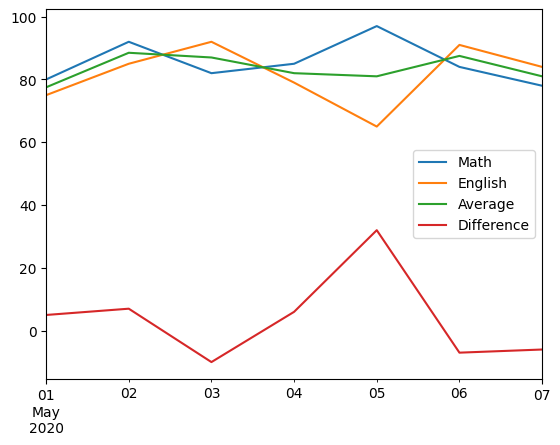

In [99]:
 # Table이름.plot() --> graph그리기 --> pandas의 DataFrame에 있는 명령어, plot
exam.plot()

> **Q. Title, x label, y label을 넣어보고 plot size도 늘려 봅시다.**

Text(0, 0.5, 'Score')

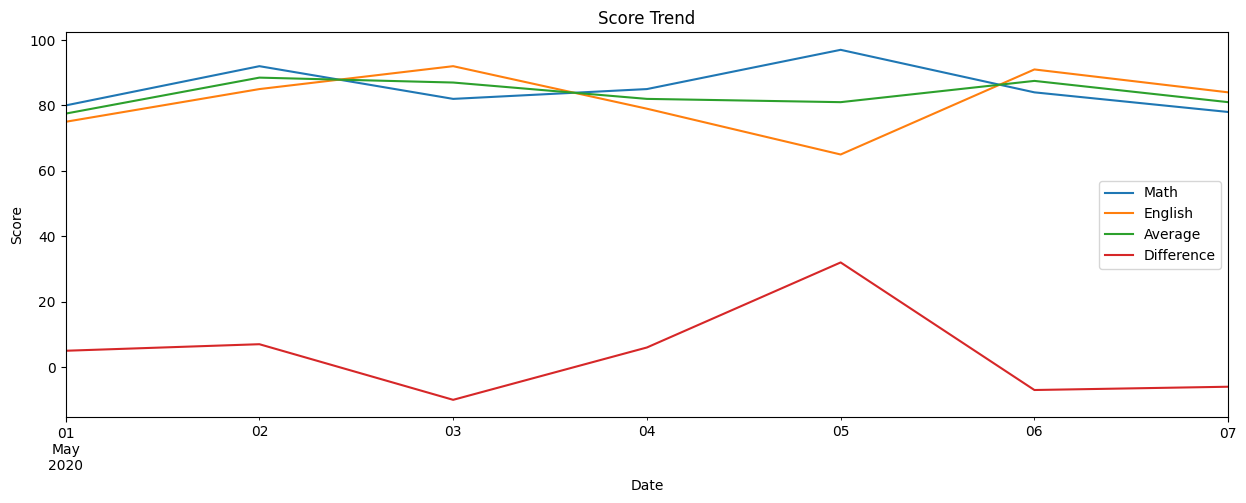

In [100]:
# 같이 해봅시다.^^
exam.plot(title='Score Trend', figsize=(15,5)) # Pandas DataFrame 명령어

plt.xlabel('Date')
plt.ylabel('Score')

> **Q. 다른 형태의 그래프는 어떻게 그릴 수 있을까요?**

Text(0, 0.5, 'Score')

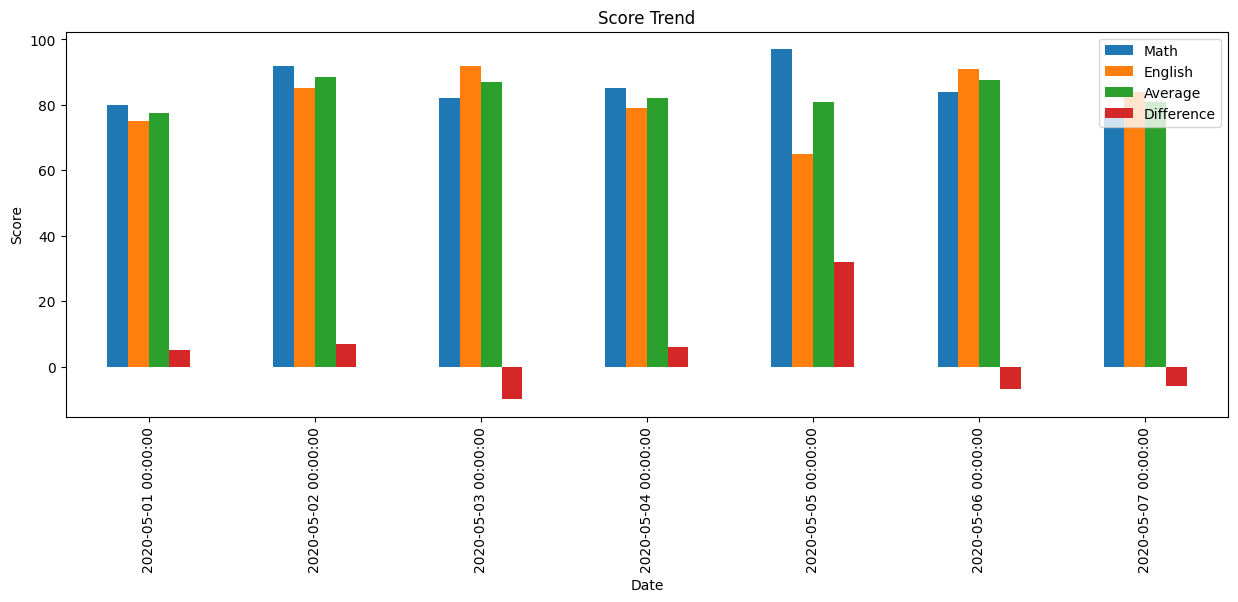

In [101]:
exam.plot(title='Score Trend', figsize=(15,5),kind='bar') # Pandas 

plt.xlabel('Date')
plt.ylabel('Score')

#### matplotlib
- 그래프용 라이브러리로 히스토그램, 산포도 등을 그리는데 사용됨
- 쥬피터 노트북에 결과 그래프가 나타나게 하려면 %matplotlib inline 매크로를 실행해야 함
- (또는 matplotlib.pyplot.show 함수로 그림을 그릴 수도 있음)